# To convert numerical data into categorical data, there are 2 famous techniques:-
1. Discretization (Binning)
2. Binarization

# Types of Binning
1. Unsupervised Binning
    1.1 Equal Width (uniform) Binning
    1.2 Equal frequency (quantile) Binning
    1.3 Kmeans Binning
2. Supervised Binning
    2.1 Decision Tree Binning
3. Custom Binning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000
...,...,...
92,46.0,61.1750
134,25.0,13.0000
337,41.0,134.5000
548,33.0,20.5250


In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
y_pred = clf.predict(X_test)


In [14]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [15]:
np.mean(cross_val_score(clf,X,y,cv=10))

0.6288928012519561

In [16]:
# using descretization

# using KBinsDiscretizer and Quantile strategy

kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [17]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [18]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

/Users/pratyushtiwari/Desktop/Machine Learning CampusX/myvenv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/Users/pratyushtiwari/Desktop/Machine Learning CampusX/myvenv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


In [19]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [20]:
trf.named_transformers_['first'].bin_edges_


array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [22]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [23]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
509,26.0,4.0,56.4958,8.0,"(25.0, 28.5]","(51.479, 82.171]"
492,55.0,9.0,30.5000,7.0,"(50.0, 80.0]","(29.125, 51.479]"
434,50.0,9.0,55.9000,8.0,"(42.0, 50.0]","(51.479, 82.171]"
476,34.0,6.0,21.0000,5.0,"(32.0, 36.0]","(15.75, 26.0]"
74,32.0,6.0,56.4958,8.0,"(28.5, 32.0]","(51.479, 82.171]"


In [24]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [26]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

/Users/pratyushtiwari/Desktop/Machine Learning CampusX/myvenv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(
/Users/pratyushtiwari/Desktop/Machine Learning CampusX/myvenv/lib/python3.11/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


0.6358763693270736

In [27]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6330594679186228


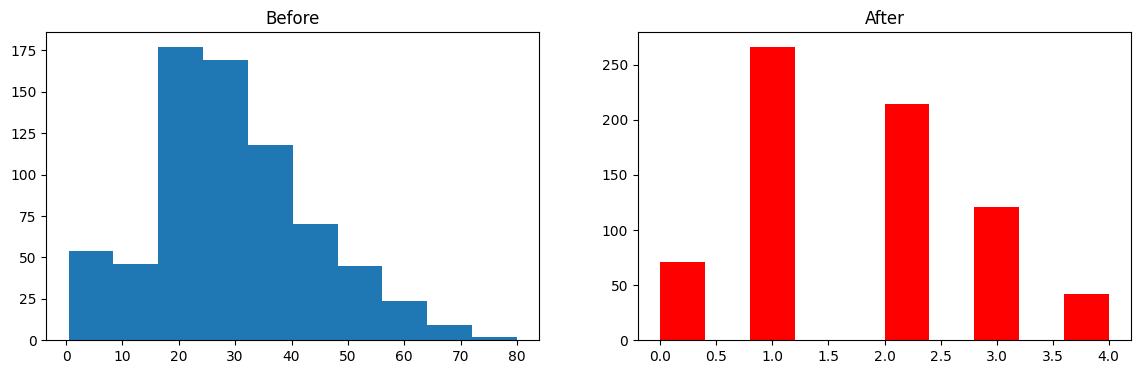

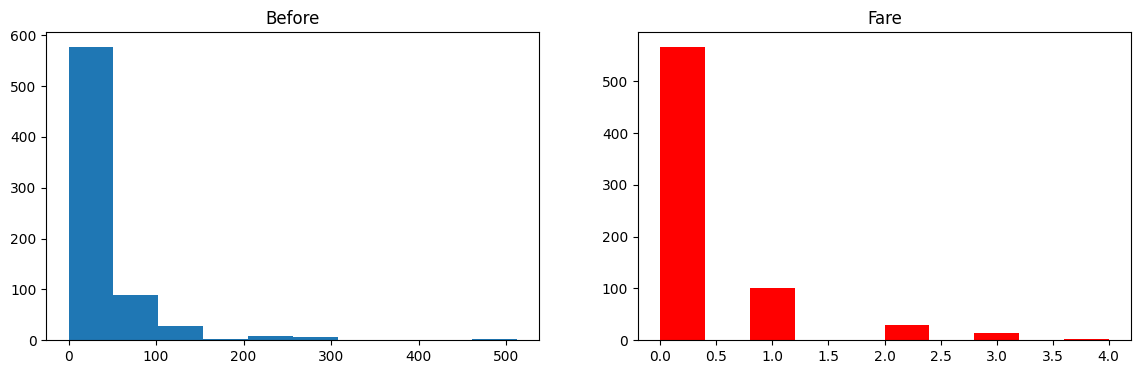

In [28]:
discretize(5,'kmeans')